# Week 10 Mini Assignment - Timothy D'Cruz

## Data Exploration
This notebook will be using libraries such as pandas and matplotlib to analyse and complete basic exploration on the datasets of person1-step and person2-step. This is an initial analysis and will provide findings as to trends and patterns in the step data. Furthermore, this notebook will be using the technique of literate programming to ensure the reproducibility and eligibility are maximised for the viewer

Wiki Entry Link: https://github.sydney.edu.au/YHOW4819/2021-DATA3406-PRAC07-Group04/wiki/Timothy-D'Cruz 

### Driving Question 1: Did I achieve my goal of X steps more in the last 12 months than the 12 months before that?

#### Driving Question 2: Do I have more steps on average during the weekend in comparison to a weekday?


### Import Datasets
Firstly, we will import the datasets. We then need to ensure the data is cleaned and in the appropriate types before we can perform analysis and visualisation techniques

In [128]:
# First, we import the nessecary libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

# We assign these with the names pd and plt for easier use and efficiency

In [17]:
# We then import the datasets and do an initial visualisation of the table to ensure the contents are correct 
# We rename the data, Data_1 and Data_2 for simplicity when performing future analysis

Data_1 = pd.read_csv('person1-step-data.csv')
Data_2 = pd.read_csv('person2-step-data.csv')

# We want to see the first few rows of the data so we apply head() function to ensure the data has imported correctly

Data_1.head()

,Source,Date,Hour,Count
0,Person1 iPhone SE,7/12/14,8,13
1,Person1 iPhone SE,7/12/14,8,13
2,Person1 iPhone SE,7/12/14,8,1
3,Person1 iPhone SE,7/12/14,8,9
4,Person1 iPhone SE,7/12/14,8,15


In [18]:
# Similarly we want to apply head() function to the second dataset aswell to ensure the data has imported correctly

Data_2.head()

,Source,Date,Hour,Count
0,Person2 Phone,29/11/14,6,6
1,Person2 Phone,29/11/14,6,4
2,Person2 Phone,29/11/14,6,3
3,Person2 Phone,29/11/14,6,9
4,Person2 Phone,29/11/14,6,6


## Issue 1: Clean the datasets for analysis

Issue link: https://github.sydney.edu.au/YHOW4819/2021-DATA3406-PRAC07-Group04/issues/14

### Initial Observations

After performing the above techniques, we have successfully imported the datasets into our Jupyter Notebook. We further observe that there are various different data types such and numerical, date and string data types. To ensure each data entry is in the correct format we will perform analysis and make any changes where it is neccesary to. 

In [29]:
# We will now visualise the types of the first person step data 
print(Data_1.dtypes)

Source            object
Date      datetime64[ns]
Hour               int64
Count              int64
dtype: object


In [30]:
# We will now visualise the types of the second person's step data 
print(Data_2.dtypes)

Source            object
Date      datetime64[ns]
Hour               int64
Count              int64
dtype: object


#### Types
As seen in the results above, count, hour and source data types are in the correct format. However, the Date is in the format of "object". We want to change this to the appropriate date format. Thus, in the code below we will change the 'Date' column to an appropriate datetime format using the pandas library.

In [31]:
# Thus, we will change the date to a pandas date format
Data_1['Date'] = pd.to_datetime(Data_1['Date'])
Data_2['Date'] = pd.to_datetime(Data_2['Date'])

#### NA Values
For further cleaning, we will be dropping the rows with any NA values. To do so we will use the function dropna(). This will allow use to clean the data and remove any NA values.

In [32]:
# For further cleaning, we will drop all NA values

Data_1_clean = Data_1.dropna()
Data_2_clean = Data_2.dropna()

#### Data entry lengths
To further clean the data, we check that there is no row length variance between the two datasets. To do so, we will firstly use the len() function on the clean datasets to check the number of row entries. We will then minus the lengths. If the result is 0, there is no entry variance. 

In [36]:
# Check the length of each clean dataset using len() function

Data_1_row_len = len(Data_1_clean.index)
Data_2_row_len = len(Data_2_clean.index)

# Now check for potenital row variance by subtracting the row variances

Variance = Data_1_row_len - Data_2_row_len
Variance

-302472

Thus, we can see there is a fairly large row variance. A number of -302472 indicates that Person2 has 302472 more entries of step data than Person1. However, this does not raise to much concern as the datasets will be analysed separately and thus does not need to have 0 variance. 

### Checking and converting to monthly and yearly step count to perform and create analysis for the group's driving problem

Now that we can cleaned the data, it is now ready to be sorted for analysis. To do so we must firstly generate the monthly step data. To do so we will firstly use the groupby() function and Pandas' Grouper function to sort the data into frequencies of month. We group using the key as 'Date' and Freq using 'M' representative of monthly data. 

In [55]:
# Using the pd grouper and groupby function we sort the date data by month

Monthly_Data_1 = Data_1.groupby(pd.Grouper(key='Date',freq='M')).sum()

# To count (using the sum() function) and print the data we use print function to visualise the sorted data the data

print("Person 1 Step Count by Month\n", Monthly_Data_1.head())

# We then perform the same techniques to the second person's step data

Monthly_Data_2 = Data_2.groupby(pd.Grouper(key='Date',freq='M')).sum()

print("Person 1 Step Count by Month\n", Monthly_Data_2.head())


Person 1 Step Count by Month
             Hour  Count
Date                   
2014-07-31  1980   2693
2014-08-31  7602   6567
2014-09-30  5918   6879
2014-10-31  6229   7845
2014-11-30  1210    916
Person 1 Step Count by Month
              Hour  Count
Date                    
2014-01-31   9739   6672
2014-02-28   2146   9658
2014-03-31   2673   1709
2014-04-30  14566  10727
2014-05-31   6178   4170


Thus, we have observed that our sorting has performed correctly for the month data. Thus, we will replicate these steps and techniques to sort the data into frequencies of year. 

In [98]:
# Using the pd grouper and groupby function we sort the date data by year

Yearly_Data_1 = Data_1.groupby(pd.Grouper(key='Date',freq='Y')).sum()

# To count (using the sum() function) and print the data we use print function to visualise the sorted data the data

print("Person 1 Step Count by Month\n", Yearly_Data_1.head())

# We then perform the same techniques to the second person's step data

Yearly_Data_2 = Data_2.groupby(pd.Grouper(key='Date',freq='Y')).sum()

print("Person 1 Step Count by Month\n", Yearly_Data_2.head())

Person 1 Step Count by Month
                Hour    Count
Date                        
2014-12-31   112994   111590
2015-12-31  1075484  1582971
2016-12-31    90648  1742364
2017-12-31   275369  1800474
2018-12-31   235034  2339228
Person 1 Step Count by Month
                Hour    Count
Date                        
2014-12-31   287590   199813
2015-12-31  1239800  3843685
2016-12-31   953628  5335886
2017-12-31   798618  5482973
2018-12-31   839743  5869950


Thus, we have observed that our sorting has performed correctly for the yearly data aswell.

## Issue 2: Perform Visualisation Techniques on the sorted data

Issue Link: https://github.sydney.edu.au/YHOW4819/2021-DATA3406-PRAC07-Group04/issues/3

Now that the data is sorted appropriately, we will now start to find observations and ideas for our driving question. To do so, we will apply some visualisation techniques for analysis of both the monthly and yearly step data. 

In [101]:
# To start, we isolate the count data to perform visualisation techniques, we transfer it into a data frame using pd.DataFrame

Monthly_Count_Data_1 = pd.DataFrame(data = Monthly_Data_1['Count'])
Monthly_Count_Data_2 = pd.DataFrame(data = Monthly_Data_2['Count'])

# Repeat the same process for yearly step data

Yearly_Count_Data_1 = pd.DataFrame(data = Yearly_Data_1['Count'])
Yearly_Count_Data_2 = pd.DataFrame(data = Yearly_Data_2['Count'])

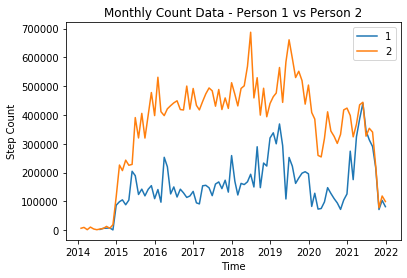

In [121]:
# We then use the data and plot a simple line chart using the plt.plot() function to gain some initial insight

plt.plot(Monthly_Count_Data_1)
plt.plot(Monthly_Count_Data_2)

# We then add a title, x/y axis labels and a legend to help the viewer understand the visualisation better

plt.title("Monthly Count Data - Person 1 vs Person 2")
plt.xlabel("Time")
plt.ylabel("Step Count")
plt.legend("12")

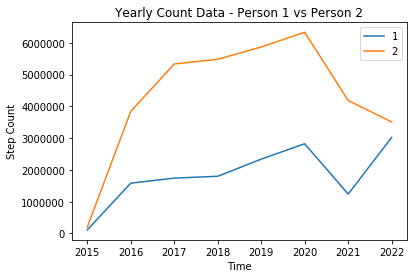

In [120]:
# We repeat the above process to observed the smoothing of the data using yearly figures

plt.plot(Yearly_Count_Data_1)
plt.plot(Yearly_Count_Data_2)

# We then add a title, x/y axis labels and a legend to help the viewer understand the visualisation better

plt.title("Yearly Count Data - Person 1 vs Person 2")
plt.xlabel("Time")
plt.ylabel("Step Count")
plt.legend("12")

From the initial analysis and obversations we can see that person 2 has a higher step count over the period. Towards the end of the periods we can see a slight conversion (in graph 1) where by each person appears to be roughly completing the same amount of steps. These graphs however do not help us solve the driving question. From initial analysis we can see a slight upward trend in some periods. This may indicate the potential of yearly step goal being met. However, we will need to conduct more indepth analysis to gain more insights into the driving question. 

### Interesting trend
By visualising the first graph, we can see a spike at the start of each year especially in person 1. This spike may represent new year goals to increase walking or step count. This spike is almost seen at the start of every year and decreases signficiantly as the year progresses. Could this affect the results of the driving question? It would have to depend on the selected period that is representative of 12 months. 

### Issue 3: Defining step goal

Before we can create visualisations to answer our driving question we have to define and make an assumption about what each individual's goals are. Once we have defined this, we can make an analysis as to whether or not the goals has been met.

Issue link: https://github.sydney.edu.au/YHOW4819/2021-DATA3406-PRAC07-Group04/issues/15


Research has deduced that an appropriate daily step goal of 10,000 is healthy and most common amongst individuals (Rieck, 2020). This was common amongst both males and females and is recommended from a medical stand point for increases in health and fitness. Thus, we will assume a daily step goal of 10,000 for our analysis

Article: https://www.mayoclinic.org/healthy-lifestyle/fitness/in-depth/10000-steps/art-20317391#:~:text=The%20average%20American%20walks%203%2C000,a%20day%20every%20two%20weeks.

### The leading comment cells explaining the purpose of the work you will do
- Ethical analysis and any potential bias in everyone's graphs and analysis
- Ethical analysis and any potential bias in everyone's graphs and analysis
- Further analysis into the driving question 2
- The completion and presentation of associated slides to the work
- Further potential cleaning related to outliers and incorrect values
- Review of all literate programming from other people to ensure legibility clear understanding



#### Ethical analysis and any potential bias in everyone's graphs and analysis
- I have been assigned this section of the assignment 2. I will be analysing all the graphs put forward by other group members
- I will make comments on the potential ethical biases that have occured the how they may skewed and affect the results and findings
- From this we will further discuss methods and ways to reduce the effects of such biases and any potential future planning to reduced the implications of bias